In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data_train = pd.read_csv('../data_cleaned/data_train.csv')
item_categories = pd.read_csv('../data_cleaned/item_categories.csv')
items = pd.read_csv('../data_cleaned/items.csv')
shops = pd.read_csv('../data_cleaned/shops.csv')

In [3]:
merged = data_train.merge(items, how='left').merge(item_categories, how='left').merge(shops, how='left')

In [4]:
merged

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
4,10.01.2013,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Музыка - Музыкальное видео,"Москва ТРК ""Атриум"""
...,...,...,...,...,...,...,...,...,...,...
2928480,10.10.2015,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2928481,09.10.2015,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2928482,14.10.2015,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2928483,22.10.2015,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,"Москва ТРК ""Атриум"""


In [5]:
dates = pd.to_datetime(merged['date'], format='%d.%m.%Y')


In [6]:
merged['month'] = dates.apply(lambda x:x.month)

In [7]:
merged[['item_name','shop_name','date_block_num','item_price','item_cnt_day']].groupby(['item_name','shop_name','date_block_num']).mean()

item_price  \
item_name                                          shop_name                date_block_num               
! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D          Химки ТЦ "Мега"          20                    58.0   
!ABBYY FineReader 12 Professional Edition Full ... Цифровой склад 1С-Онлайн 15                  4490.0   
                                                                            18                  4490.0   
                                                                            19                  4490.0   
                                                                            20                  4490.0   
...                                                                                                ...   
Яйцо для Little Inu                                Интернет-магазин ЧС      8                    799.0   
                                                   Коломна ТЦ "Рио"         1                    799.0   
                                                   СПб ТК "Невский Центр"   1                    799.0   
                                                   СПб ТК "Сенная"          2                    798.5   
Яйцо дракона (Игра престолов)                      Москва ТРК "Атриум"      14                  4349.0   

                                                                                            item_cnt_day  
item_name                                          shop_name                date_block_num                
! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D          Химки ТЦ "Мега"          20                       1.0  
!ABBYY FineReader 12 Professional Edition Full ... Цифровой склад 1С-Онлайн 15                       1.0  
                                                                            18                       1.0  
                                                                            19                       1.0  
                                                                            20                       1.0  
...                                                                                                  ...  
Яйцо для Little Inu                                Интернет-магазин ЧС      8                        1.0  
                                                   Коломна ТЦ "Рио"         1                        1.0  
                                                   СПб ТК "Невский Центр"   1                        1.0  
                                                   СПб ТК "Сенная"          2                        1.0  
Яйцо дракона (Игра престолов)                      Москва ТРК "Атриум"      14                       1.0  

[1608225 rows x 2 columns]

In [8]:
df=merged.groupby(['shop_id','item_id','date_block_num']).size().reset_index()[0]
df

0          1
1          1
2          1
3          1
4          1
          ..
1608220    2
1608221    1
1608222    1
1608223    2
1608224    1
Name: 0, Length: 1608225, dtype: int64

<Axes: >

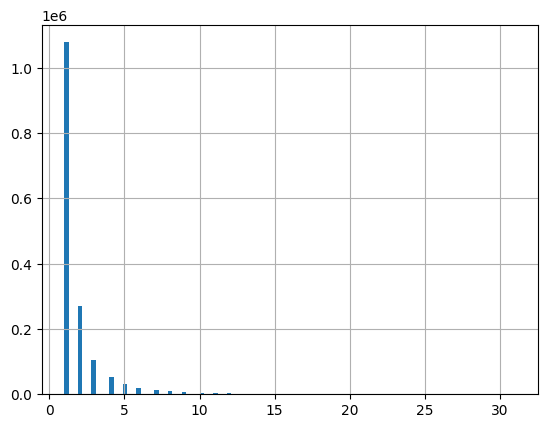

In [9]:
df.hist(bins=100)# - most of products in one shop sold in only one month hist(bins=100)

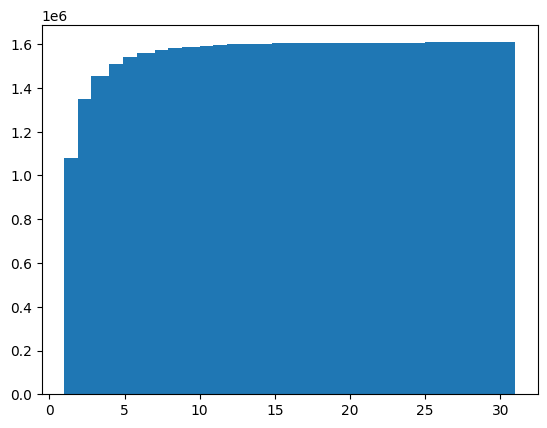

In [10]:
plt.hist(df,bins=100, cumulative=True);

In [11]:
def check_continuity(column_name):
    merged[merged['item_name']==column_name]['date'].nunique() -\
        merged['date'].nunique()
    
    diff=set(merged['date'].unique())-set(merged[merged['item_name']==column_name]['date'].unique())
    print(f'no info about {len(diff)} days')
    max_diff = pd.to_datetime(pd.Series(list(diff)), format='%d.%m.%Y').sort_values().diff().max()
    print('max_diff:',max_diff)
    
    d = merged[merged['item_name']==column_name].groupby('date').agg({'item_cnt_day':'mean'})
    #print(d.reset_index())
    d=d.reset_index()
    
    plt.scatter(pd.to_datetime(pd.Series(list(diff)).sort_values(), format='%d.%m.%Y'),[1]*len(diff),color='red',zorder=-1)
    plt.plot(pd.to_datetime(d['date'], format='%d.%m.%Y').sort_values(),d['item_cnt_day'],zorder=1)
    
#No info about packeti for 113 days - they all are sequent!

no info about 1028 days
max_diff: 2 days 00:00:00


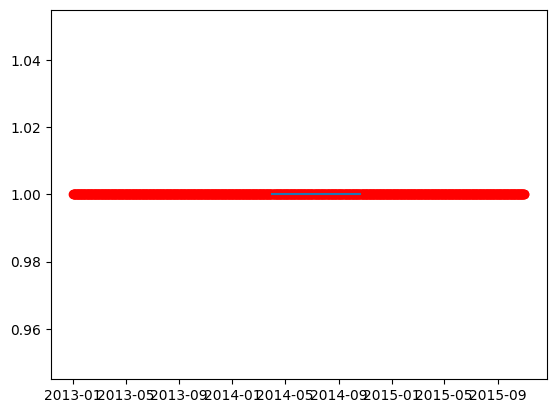

In [12]:
check_continuity('!ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]')# - sales per month = sum of sales per day (because misses dont mean no data, they mean 0)

In [13]:
grouped=merged.groupby(['shop_id','item_id','date_block_num']).agg({'item_price':'mean',
                                                                    'item_cnt_day':'sum',
                                                                    'item_category_name':'unique',
                                                                    'month':'unique'})#take some time

KeyboardInterrupt: 

In [ ]:
grouped=grouped.reset_index()

In [ ]:
grouped

In [ ]:
grouped['item_category_name']=grouped['item_category_name'].apply(lambda a:a[0])
grouped['month']=grouped['month'].apply(lambda a:a[0])

In [ ]:
grouped=grouped.rename({'item_price':'avg_item_price','item_cnt_day':'item_cnt_month'}, axis='columns')

In [ ]:
grouped

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
plot_pacf(grouped['avg_item_price'],lags=33)

In [ ]:
plot_pacf(grouped['item_cnt_month'],lags=33)

In [ ]:

def create_lags(data,item_lags=None,price_lags=None):
    lagged_items = data[['date_block_num','item_cnt_month','shop_id','item_id']].copy()
    for lag in item_lags:
        lagged_items['date_block_num']+=lag#previous month becomes present
        data=data.merge(lagged_items, how='left',on=['date_block_num','shop_id','item_id'], suffixes=('', f'_lag_{lag}'))
        lagged_items['date_block_num']-=lag

    lagged_prices = data[['date_block_num','avg_item_price','shop_id','item_id']].copy()
    for lag in price_lags:
        lagged_prices['date_block_num']+=lag#previous month becomes present
        data=data.merge(lagged_prices, how='left',on=['date_block_num','shop_id','item_id'], suffixes=('', f'_lag_{lag}'))
        lagged_prices['date_block_num']-=lag

        
    return data

In [ ]:
#list[(*range(1,15),24])

In [ ]:
item_lags=list([*range(1,7),12,13,24])
price_lags=list([*range(1,7),12,24])
lagged = create_lags(grouped,item_lags=item_lags,price_lags=price_lags)

In [ ]:
lagged.isna().sum()

In [ ]:
sns.heatmap(lagged[['item_cnt_month',*[f'item_cnt_month_lag_{i}' for i in item_lags]]].corr(),annot=True,annot_kws={'fontsize':7})

In [ ]:
sns.heatmap(lagged[['avg_item_price',*[f'avg_item_price_lag_{i}' for i in price_lags]]].corr(),annot=True,annot_kws={'fontsize':7})

In [ ]:

plt.scatter(lagged['avg_item_price_lag_1'],lagged['item_cnt_month'])


In [ ]:

plt.scatter(lagged['avg_item_price_lag_1'],lagged['avg_item_price_lag_24'])


In [ ]:
lagged

In [ ]:
lagged_month = lagged.groupby('month').agg({'item_cnt_month':'sum'}).reset_index()

In [ ]:
lagged_month

In [ ]:

plt.scatter(lagged_month['month'],lagged_month['item_cnt_month'])


In [ ]:
grouped['super_category'] = grouped['item_category_name'].apply(lambda a: a.split()[0])

In [ ]:
grouped

In [ ]:
grouped_check_by_monthes = grouped[['item_id',
                                    'date_block_num',
                                    'item_category_name',
                                    'super_category',
                                   'shop_id']].groupby(['shop_id','date_block_num']).agg({'item_id':'unique',
                                                                                      'item_category_name':'unique',
                                                                                      'super_category':'unique'})

In [ ]:
grouped_check_by_monthes=grouped_check_by_monthes.reset_index()
grouped_check_by_monthes

In [ ]:
grouped_check_by_monthes.index

In [ ]:
grouped_check_by_monthes

In [ ]:
item_name=grouped_check_by_monthes['item_id']
item_category_name=grouped_check_by_monthes['item_category_name']
super_category=grouped_check_by_monthes['super_category']

sub_cat_diff = []
super_cat_difff = []
name_difff = []
for row in grouped_check_by_monthes.index[:-1]:
    
    item_category_name_diff  = set(item_category_name[row+1]) - set(item_category_name[row])
    super_category_name_diff  = set(super_category[row+1]) - set(super_category[row])
    item_name_diff  = set(item_name[row+1]) - set(item_name[row])
    
    sub_cat_diff.append(list(item_category_name_diff))
    super_cat_difff.append(list(super_category_name_diff))
    name_difff.append(list(item_name_diff))

print(len(sub_cat_diff))
print(len(super_cat_difff))
print(len(name_difff))
df = pd.DataFrame({'num_block and shop_id':range(0,1581),
                   'sub_category_diffs':[len(el) for el in sub_cat_diff],
                   'super_cat_difff': [len(el) for el in super_cat_difff],
                   'item_diff': [len(el) for el in name_difff]})

In [ ]:
df.describe()# - dataframe where we can see how many new *SMTH* appeared each month

In [ ]:
grouped_check_by_monthes

In [ ]:
lagged_fist_month=lagged[lagged['item_cnt_month_lag_1'].isna()]
lagged_fist_month.drop(['shop_id','item_id','date_block_num','avg_item_price','item_cnt_month','item_category_name','month'],axis=1)

In [ ]:
lagged_fist_month= lagged_fist_month[lagged_fist_month.isna().sum(axis=1) == 17]


In [ ]:
#средняя цена категории и суперкатегории в прошлом месяце для тех кто первый раз
#есть вещи которые не продавались ни разу

In [ ]:
items

In [ ]:
grouped

In [ ]:
def id_to_cat(id):
    return items[items['item_id'] == id]['item_category_id']

In [ ]:
grouped_category=grouped.groupby(['item_category_name','shop_id','date_block_num']).agg({'avg_item_price':'mean',
                                                                    'item_cnt_month':'mean',
                                                                    'month':'unique'})#take some time

In [ ]:
grouped_category=grouped_category.reset_index()
grouped_category['month']=grouped_category['month'].apply(lambda a:a[0])
grouped_category

In [ ]:
item_lags=list([*range(1,7),12,13,24])
price_lags=list([*range(1,7),12,24])

In [ ]:

def create_lags_categories(data,item_lags=None,price_lags=None):
    lagged_items = data[['date_block_num','item_cnt_month','shop_id','item_category_name']].copy()
    for lag in item_lags:
        lagged_items['date_block_num']-=lag#previous month becomes present
        data=data.merge(lagged_items, how='left',on=['date_block_num','shop_id','item_category_name'], suffixes=('', f'_lag_{lag}'))
        lagged_items['date_block_num']+=lag

    lagged_prices = data[['date_block_num','avg_item_price','shop_id','item_category_name']].copy()
    for lag in price_lags:
        lagged_prices['date_block_num']-=lag#previous month becomes present
        data=data.merge(lagged_prices, how='left',on=['date_block_num','shop_id','item_category_name'], suffixes=('', f'_lag_{lag}'))
        lagged_prices['date_block_num']+=lag

        
    return data

In [ ]:
grouped_category_lagged = create_lags_categories(grouped_category,item_lags=item_lags,price_lags=price_lags)
grouped_category_lagged

In [ ]:
grouped_category_lagged.isna().sum()

In [ ]:
grouped['super_category'] = grouped['item_category_name'].apply(lambda a: a.split()[0])

In [ ]:
grouped['super_category'].unique()

In [ ]:
grouped_super_category=grouped.groupby(['super_category','shop_id','date_block_num']).agg({'avg_item_price':'mean',
                                                                    'item_cnt_month':'mean',
                                                                    'month':'unique'})#take some tim

grouped_super_category=grouped_super_category.reset_index()
grouped_super_category['month']=grouped_super_category['month'].apply(lambda a:a[0])
grouped_super_category

In [ ]:

def create_lags_super_categories(data,item_lags=None,price_lags=None):
    lagged_items = data[['date_block_num','item_cnt_month','shop_id','super_category']].copy()
    for lag in item_lags:
        lagged_items['date_block_num']+=lag#previous month becomes present
        data=data.merge(lagged_items, how='left',on=['date_block_num','super_category'], suffixes=('', f'_lag_{lag}'))
        lagged_items['date_block_num']-=lag

    lagged_prices = data[['date_block_num','avg_item_price','super_category']].copy()
    for lag in price_lags:
        lagged_prices['date_block_num']+=lag#previous month becomes present
        data=data.merge(lagged_prices, how='left',on=['date_block_num','super_category'], suffixes=('', f'_lag_{lag}'))
        lagged_prices['date_block_num']-=lag

        
    return data

In [ ]:
grouped_super_category_lagged = create_lags_super_categories(grouped_super_category,item_lags=item_lags,price_lags=price_lags)
grouped_super_category_lagged

In [ ]:
grouped_super_category_lagged.isna().sum()

In [ ]:
lagged

In [ ]:
def transform(data_train, item_categories,items,shops ):
    grouped=data_train.groupby(['shop_id','item_id','date_block_num']).agg({'item_price':'mean',
                                                                    'item_cnt_day':'sum'
                                                                    })#take some (a lot)))) ) time

    data_train = data_train.sort_values(by='date_block_num')
    grouped=grouped.reset_index()
    merged = grouped.merge(items, how='left').merge(item_categories, how='left').merge(shops, how='left')
    merged['month'] = number_to_month(merged['date_block_num'])
    merged['year'] = merged['date_block_num'].apply(convert_to_year)
    merged['super_category'] = merged['item_category_name'].apply(lambda a: a.split()[0])
    merged['city'] = merged['shop_name'].apply(parse_city)
    merged=merged.rename(columns={'item_price':'avg_item_price','item_cnt_day':'item_cnt_month'})
    item_lags=list([*range(1,7),12,13,24])
    price_lags=list([*range(1,7),12,24])
    lagged = create_lags(merged,item_lags=item_lags,price_lags=price_lags)#takes a bit time
    lagged['shop_id_cat'] = lagged['shop_id'].astype('str')
    lagged['item_id_cat'] = lagged['item_id'].astype('str')
    lagged['item_category_id_cat'] = lagged['item_category_id'].astype('str')
    lagged = encode_numerical_features(lagged, features=['item_category_id_cat', 'super_category','city'])#this part may not be used 
    gr = grouped.groupby(['shop_id','item_id']).agg({'date_block_num':'unique'})
    df = merged
    
    # 1. Create the 'first_date_block_num' column (first appearance of each item_id)
    df['first_date_block_num'] = df.groupby('item_id')['date_block_num'].transform('min')
    
    # 2. Create the 'first_cat_block_num' column (first appearance of each item_category_id)
    df['first_cat_block_num'] = df.groupby('item_category_id')['date_block_num'].transform('min')
    df['first_sup_cat_block_num'] = df.groupby('super_category')['date_block_num'].transform('min')
    df = create_lags_columns(df,columns=['date_block_num','super_category'] )
    df = create_lags_columns(df,columns=['date_block_num','item_id'] )
    df = create_lags_columns(df,columns=['date_block_num','city'] )
    df = create_lags_columns(df,columns=['date_block_num','item_category_name'] )
    df = calculate_ema_3(df, target='avg_item_price')
    df = calculate_ema_3(df, target='item_cnt_month')
    first_index_block_3 = df[df['date_block_num'] == 3 ].index[0]
    #blocks = [df[df['date_block_num'] == block-1 ].index[-1] for block in np.sort(df.date_block_num.unique())[1:]]
    
            